In [1]:
# conda install fastai


In [2]:
from fastai import *
import fastai
from fastai.text.all import *
# from fastai.text import *
# from fastai.test_utils import *
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [3]:
import torch
torch.cuda.is_available()
# fastai.__version__

True

In [4]:
path = Path('./data')

df = pd.read_csv(path/'final_cleaned_data.csv')

In [5]:
bs = 20

In [6]:
df.head()

,Unnamed: 0,text
0,0,Supporting farmers means supporting our country #StopHateAgainstFarmers #FarmersProtest
1,1,Support farmers if you are related to food #StopHateAgainstFarmers #FarmersProtest
2,2,#StopHateAgainstFarmers support #FarmersProtest by pressurising got. to accept farmer's genuine demand.
3,3,"You hate farmers I hate you, if you love them I love you! ;) #StopHateAgainstFarmers #FarmersProtest"
4,4,They can't be farmers. Looks like Gundas are having good time. They seem to be violence thirsty goons. #FarmersProtest …


In [7]:
df=df.iloc[:, 1:]

In [8]:
df.head()

,text
0,Supporting farmers means supporting our country #StopHateAgainstFarmers #FarmersProtest
1,Support farmers if you are related to food #StopHateAgainstFarmers #FarmersProtest
2,#StopHateAgainstFarmers support #FarmersProtest by pressurising got. to accept farmer's genuine demand.
3,"You hate farmers I hate you, if you love them I love you! ;) #StopHateAgainstFarmers #FarmersProtest"
4,They can't be farmers. Looks like Gundas are having good time. They seem to be violence thirsty goons. #FarmersProtest …


In [9]:
# df = df.sample(n=200000, random_state=30)

In [10]:
# !conda install --file requirements.txt


In [11]:
print(fastai.__version__)

2.5.3


In [12]:
valid = np.random.choice([False,True], len(df['text']), p= [0.9, 0.1])
df['is_valid'] = valid
df.head()

,text,is_valid
0,Supporting farmers means supporting our country #StopHateAgainstFarmers #FarmersProtest,False
1,Support farmers if you are related to food #StopHateAgainstFarmers #FarmersProtest,False
2,#StopHateAgainstFarmers support #FarmersProtest by pressurising got. to accept farmer's genuine demand.,True
3,"You hate farmers I hate you, if you love them I love you! ;) #StopHateAgainstFarmers #FarmersProtest",True
4,They can't be farmers. Looks like Gundas are having good time. They seem to be violence thirsty goons. #FarmersProtest …,False


In [13]:
# from lang_model import *
# data_lm = lang_model(df, path, 'text', bs)
data_lm = DataBlock(blocks=TextBlock.from_df('text', is_lm=True),
                    get_x=ColReader('text'),
                    splitter=ColSplitter())
dls = data_lm.dataloaders(df, bs=bs, seq_len=72)
dls.show_batch(max_n=6)


,text,text_
0,"xxbos xxmaj about situation in xxmaj india , curious to know how # xxunk members would respond , whenever . xxmaj meanwhile , thrilled to watch arnab - kangana duo dedicated to uproot terrorism from country . # lol xxmaj about me , well i am # withfarmerstillmylastbreath # takebackfarmlaws # farmersprotest xxbos xxmaj is her account not withheld by xxup i&b ministry for tweeting abt # farmersprotest ? 🤔 … xxbos","xxmaj about situation in xxmaj india , curious to know how # xxunk members would respond , whenever . xxmaj meanwhile , thrilled to watch arnab - kangana duo dedicated to uproot terrorism from country . # lol xxmaj about me , well i am # withfarmerstillmylastbreath # takebackfarmlaws # farmersprotest xxbos xxmaj is her account not withheld by xxup i&b ministry for tweeting abt # farmersprotest ? 🤔 … xxbos #"
1,with true perseverance and xxunk determination … … . ! ! # मुजफ्फरनगर_किसान_महापंचायत # farmersprotest xxbos xxmaj example - how to spread fake news by giving sensational headlines . xxmaj and xxmaj leftist / xxunk just started reacting and spreading fake news . xxmaj shame on these illiterate people . # farmersprotest # andolanjivi # tuesdaymotivations # chocolateday # farmersprotest xxbos xxmaj free the fake prisoners # farmersprotest # farmersareindia … xxbos,true perseverance and xxunk determination … … . ! ! # मुजफ्फरनगर_किसान_महापंचायत # farmersprotest xxbos xxmaj example - how to spread fake news by giving sensational headlines . xxmaj and xxmaj leftist / xxunk just started reacting and spreading fake news . xxmaj shame on these illiterate people . # farmersprotest # andolanjivi # tuesdaymotivations # chocolateday # farmersprotest xxbos xxmaj free the fake prisoners # farmersprotest # farmersareindia … xxbos #
2,ever … … # farmersprotest # farmerscallbjpboycott # farmerscallbjpboycott # farmerscallbjpboycott xxmaj from everywhere … . 🤨 😏 😡 💪 🏻 xxbos xxmaj farmers protest towards the xxmaj moselle xxmaj prefecture in xxmaj metz against the reform of the xxup cap and to demand fair remuneration of their products . ( metz xxmaj news ) xxmaj mark : - xxmaj disturbances # xxmaj france # farmersprotest … xxbos after reading these both,… … # farmersprotest # farmerscallbjpboycott # farmerscallbjpboycott # farmerscallbjpboycott xxmaj from everywhere … . 🤨 😏 😡 💪 🏻 xxbos xxmaj farmers protest towards the xxmaj moselle xxmaj prefecture in xxmaj metz against the reform of the xxup cap and to demand fair remuneration of their products . ( metz xxmaj news ) xxmaj mark : - xxmaj disturbances # xxmaj france # farmersprotest … xxbos after reading these both pictures
3,"xxmaj instagram # farmersprotest xxbos xxmaj the xxmaj one 's who feed us are hungry , # farmersprotest # xxmaj farmers # farmersprotests xxbos xxmaj thank you for standing by the truth ! 🙏 # farmersprotest # bjpgovtdictatingtwitter xxbos xxmaj farmers unions of xxmaj himachal xxmaj pradesh came together against corporate loot supported by xxmaj government . # farmersprotest # novotetobjp # modigovtambaniadani xxbos xxmaj let ’s refer to farmers as pm","instagram # farmersprotest xxbos xxmaj the xxmaj one 's who feed us are hungry , # farmersprotest # xxmaj farmers # farmersprotests xxbos xxmaj thank you for standing by the truth ! 🙏 # farmersprotest # bjpgovtdictatingtwitter xxbos xxmaj farmers unions of xxmaj himachal xxmaj pradesh came together against corporate loot supported by xxmaj government . # farmersprotest # novotetobjp # modigovtambaniadani xxbos xxmaj let ’s refer to farmers as pm ’s"
4,"connection with rss and have connection with many bjp leaders , but still perception was he can be a bit baised only but ye to palat hi gya # farmersprotest # काले_क़ानून_वापिस_लो xxbos xxmaj this govt has brought xxmaj india to such condition that xxmaj economically it 's seems impossible for govt to repeal laws . xxmaj anyhow , repealing laws can be impossible for govt , but repealing govt is not","with rss and have connection with many bjp le

In [14]:
learn = language_model_learner(dls, AWD_LSTM, metrics=accuracy,drop_mult=0.3)

In [14]:

# data_lm = (TextList.from_csv(csv_name='final_cleaned_data.csv', path=path, cols='text')
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('data_lm.pkl')

In [15]:
import gc
# del variables
gc.collect()
torch.cuda.empty_cache()

SuggestedLRs(valley=0.010964781977236271)

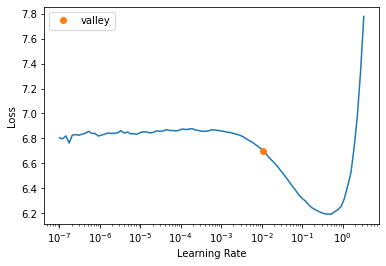

In [17]:
learn.lr_find()
# learn.recorder.plot(skip_end=15)

In [17]:
# lrs,moms = learn.recorder.,learn.recorder.hps['mom']

In [18]:
learn.fit_one_cycle(1, 0.010964781977236271, moms=(0.8,0.75, 0.7))

epoch,train_loss,valid_loss,time
0,3.682624,3.514353,1:37:08


In [19]:
learn.save('fit_head')

Path('models/fit_head.pth')

In [16]:
learn.load('fit_head')

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(10, 0.0010964781977236271,cbs=[EarlyStoppingCallback(monitor='accuracy', min_delta=0.01, patience=3),SaveModelCallback(monitor='accuracy', min_delta=0.01)], moms=(0.8,0.75,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.296316,3.196801,0.412096,2:03:30
1,3.227520,3.138426,0.425374,2:03:32
2,3.154481,3.095546,0.434081,2:06:58
3,3.080831,3.057384,0.440558,2:04:09
4,3.055596,3.022120,0.446732,2:06:36
5,2.941571,2.986491,0.453305,2:07:44
6,2.848207,2.954163,0.459024,2:07:00
7,2.805185,2.930974,0.463837,2:06:43
8,2.738222,2.923191,0.465918,2:04:33
9,2.696229,2.924379,0.466131,2:03:39


Better model found at epoch 0 with accuracy value: 0.4120959937572479.
Better model found at epoch 1 with accuracy value: 0.4253743290901184.
Better model found at epoch 3 with accuracy value: 0.44055822491645813.
Better model found at epoch 5 with accuracy value: 0.4533050060272217.
Better model found at epoch 7 with accuracy value: 0.4638368487358093.


In [19]:
learn.save('fine_tuned')

Path('models/fine_tuned.pth')

In [15]:
learn.load('fine_tuned')

In [24]:
learn.predict('covidiots', n_words=40)

'covidiots madam ji , u r definitely confused with the # Sikh community that has been talking about the # farmersprotest Sometimes petrol ca n’t jump in . i just want to do ) to use Without'